<a href="https://colab.research.google.com/github/matheusglima/Python_Investing/blob/master/Carteira_aleat%C3%B3ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd 
import numpy as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
import random

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [73]:
tickers_ibov = 'ABEV3.SA ARZZ3.SA ALPA4.SA BTOW3.SA B3SA3.SA BBAS3.SA CCRO3.SA SMLS3.SA VVAR3.SA MGLU3.SA PETR4.SA USIM5.SA VALE3.SA COGN3.SA ITUB4.SA RAPT4.SA ITSA4.SA BBDC4.SA QUAL3.SA BRAP4.SA GOAU4.SA AZUL4.SA ECOR3.SA WEGE3.SA ENBR3.SA IRBR3.SA BPAC11.SA TAEE11.SA EGIE3.SA TOTS3.SA LAME4.SA EMBR3.SA HYPE3.SA MULT3.SA TIMP3.SA VIVT4.SA KLBN11.SA RAIL3.SA RADL3.SA IGTA3.SA EQTL3.SA TRIS3.SA CYRE3.SA EVEN3.SA EZTC3.SA POMO4.SA HBOR3.SA BBSE3.SA UGPA3.SA CSAN3.SA CSNA3.SA RENT3.SA LREN3.SA SAPR4.SA SBSP3.SA BRKM5.SA GOLL4.SA SUZB3.SA JBSS3.SA '
dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')['Adj Close']

ibov = yf.download(tickers='BOVA11.SA', period='1y')['Adj Close']
ibov = ibov / ibov.iloc[0]

[*********************100%***********************]  59 of 59 completed
[*********************100%***********************]  1 of 1 completed


In [74]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=247)
dados_yahoo

,ABEV3.SA,ALPA4.SA,ARZZ3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRKM5.SA,BTOW3.SA,CCRO3.SA,COGN3.SA,CSAN3.SA,CSNA3.SA,CYRE3.SA,ECOR3.SA,EGIE3.SA,EMBR3.SA,ENBR3.SA,EQTL3.SA,EVEN3.SA,EZTC3.SA,GOAU4.SA,GOLL4.SA,HBOR3.SA,HYPE3.SA,IGTA3.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,JBSS3.SA,LAME4.SA,LREN3.SA,MGLU3.SA,MULT3.SA,PETR4.SA,POMO4.SA,QUAL3.SA,RADL3.SA,RAIL3.SA,RAPT4.SA,RENT3.SA,SAPR4.SA,SBSP3.SA,SMLS3.SA,SUZB3.SA,TIMP3.SA,TOTS3.SA,TRIS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT4.SA,VVAR3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-03,16.974186,17.922327,49.776833,39.689999,35.378559,49.890385,30.832655,27.024380,29.965799,40.071247,30.344299,12.521041,10.353765,47.490002,15.714908,16.020796,9.44,44.255104,18.910000,19.033892,17.379999,6.852152,21.508936,6.404487,27.309999,1.29,29.076359,39.927670,32.517265,11.794745,33.806072,20.740425,15.439602,43.127998,24.173626,24.366087,25.266130,3.572147,19.506868,69.099434,19.520000,8.154390,36.103668,4.065211,42.618866,38.436161,31.250000,10.755576,38.765583,5.840242,19.987352,7.916249,47.569496,45.284828,4.96,18.893814
2019-06-04,16.905977,17.622787,48.148716,40.000000,35.233166,50.704491,30.992275,27.256273,30.083349,33.214397,30.146601,12.549584,10.612857,48.270000,16.408787,16.322905,9.48,43.691463,18.680000,19.955982,17.208000,7.096872,21.806293,6.374837,28.110001,1.28,28.206966,40.854130,32.976223,11.823236,33.748241,21.864437,15.567227,42.499252,24.146317,24.789244,25.470284,3.456606,19.545229,69.913536,19.299999,8.125093,35.839653,4.144864,47.290882,38.873840,30.740000,10.687810,39.558338,5.966781,19.831202,8.193318,47.842266,46.116589,4.86,18.775360
2019-06-05,16.964441,17.273327,48.843647,40.619999,34.816383,49.306141,30.515455,27.461412,29.662125,33.165764,29.632601,12.416383,10.453416,46.950001,15.812638,16.359524,9.46,43.813587,18.459999,19.519203,17.198000,7.077294,22.202770,6.276002,28.270000,1.30,28.033089,40.794361,31.631878,11.538338,33.092941,21.571215,15.164542,41.919624,23.733002,24.454655,25.139753,3.418092,19.650724,68.702301,18.940001,8.115328,35.415215,4.168467,47.252190,38.754478,30.450001,10.300570,40.390728,5.986248,19.265154,8.173528,47.140850,45.931751,4.65,18.647028
2019-06-06,17.188555,17.702665,48.645092,42.689999,36.153984,50.560825,31.184673,27.871681,30.014778,32.387680,30.472799,12.540071,10.184358,47.770000,16.223101,16.524307,9.63,43.287525,18.420000,19.509497,17.280001,7.116450,22.698368,6.276002,29.250000,1.50,27.984787,40.654892,30.873533,11.671290,33.439865,21.493023,15.252944,42.342060,23.586428,24.808926,25.548056,3.389207,19.612364,69.099434,19.040001,8.212984,36.122585,4.174370,47.068405,38.253136,29.950001,10.484509,39.825893,6.219858,19.518900,8.153737,47.540268,45.746914,4.95,18.647028
2019-06-07,17.159325,18.122017,49.240746,43.660000,35.950439,50.148983,31.193064,27.639788,30.044167,31.862474,30.709999,12.958707,10.463381,47.320000,16.213329,17.192604,9.65,43.400249,18.540001,19.237720,17.624001,7.136027,23.372381,6.453905,29.980000,1.38,27.096073,41.491699,32.074619,11.775752,33.796432,21.160707,15.616307,43.579910,24.634109,25.684769,26.014685,3.398835,19.458918,71.035416,19.100000,8.447362,36.594170,4.115366,46.091442,38.014400,30.360001,10.736216,40.678104,6.132254,19.723846,8.509969,47.403881,45.719193,5.00,18.953043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-26,12.530000,25.980000,41.540001,14.750000,46.500000,30.790001,19.209999,25.180000,33.689999,26.469999,95.400002,14.690000,4.810000,63.880001,8.530000,16.150000,13.12,41.660000,6.640000,17.170000,19.389999,7.100000,32.430000,5.440000,12.290000,1.83,30.500000,33.669998,7.390000,8.899978,22.994993,20.670000,26.900000,38.150002,64.480003,21.780001,19.670000,2.680000,23.520000,109.110001,21.410000,8.300000,36.880001,5.110000,50.150002,12.420000,37.88000

In [0]:
retorno = dados_yahoo.pct_change()
retorno

In [0]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

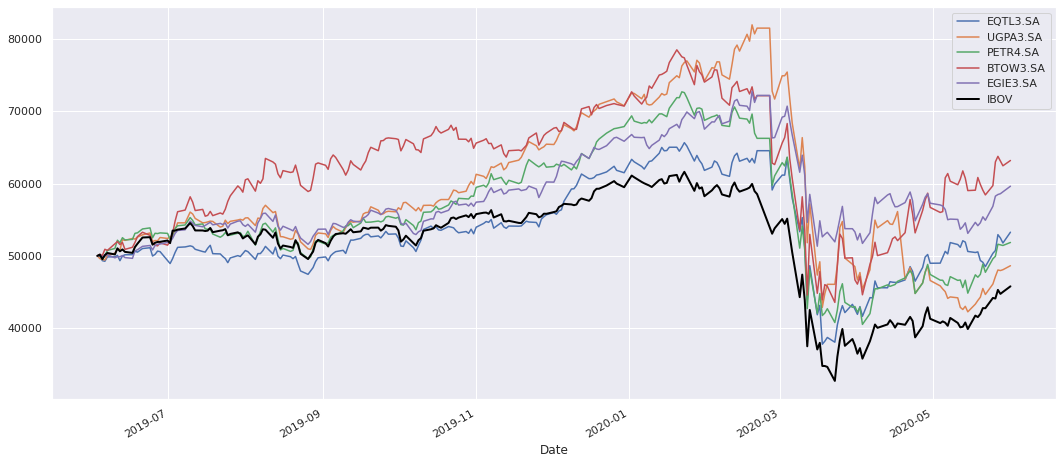

In [107]:
for i in range(5):
    carteira = random.choices(dados_yahoo.columns, k=5)
    carteira = 10000 * retorno_acumulado.loc[:,carteira]
    carteira['saldo'] = carteira.sum(axis=1)
    carteira['saldo'].plot(figsize=(18, 8), label=carteira.columns[i])
    plt.legend()
(ibov * 50000).plot(linewidth=2, color='black', label='IBOV')
plt.legend()